### Result # 1

#### SAP TMK UrFU Hackathon 2021
**Team ThinkTank**

**Case # 4. Определение количества труб в пакете**

- Агбозо Эбенезер
- Almadani Abdulkareem
- Власова Наталия 
- Гуськова Дарья Вадимовна
- Итяйкин Дмитрий Анатольевич

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

load the image

create a copy which we will use for counting the pipes

when we are done, we will load the results on the original

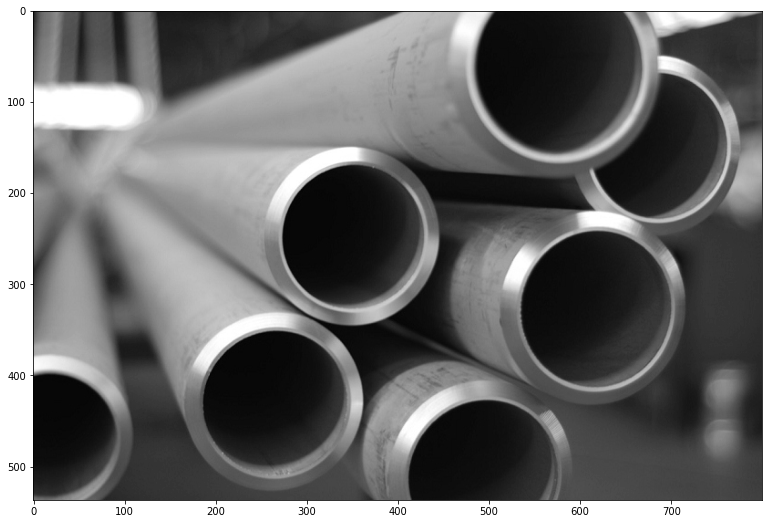

In [7]:
image = 'image/sample3.jpeg'

img = cv2.imread(image, 1)

img_orig = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = (16, 9)
plt.imshow(img, cmap='gray')

blur the image using the **Gaussian Blur**

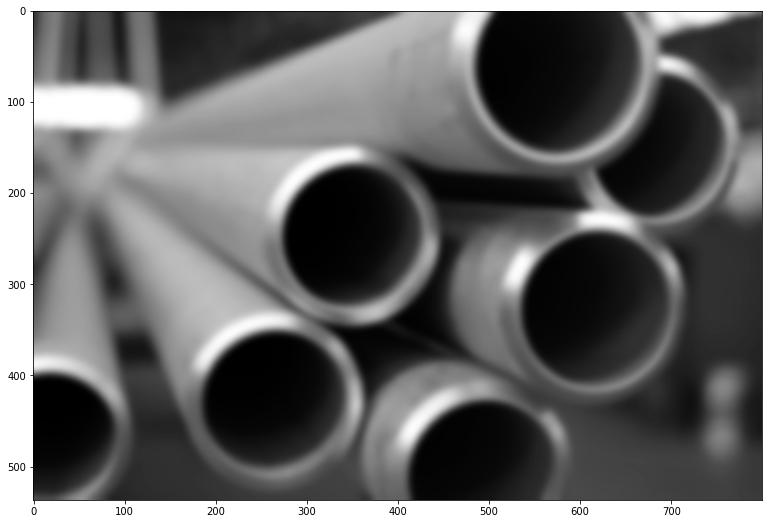

In [8]:
img = cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16, 9)
plt.imshow(img, cmap='gray')

Use the **Hough Circles** function from OpenCV to find circles and Lines

The method used is the **HOUGH_GRADIENT**

set the minimum radius and max radius (_depending on the approximate size_)

param1 & param2 for HOUGH_GRADIENT which use _Canny()_ edge detector

these parameters can be fine-tuned and adjusted

In [41]:
#circles = cv2.HoughCircles(img, cv2.cv2.HOUGH_GRADIENT, 1.2, 75)


circles =  cv2.HoughCircles(img, cv2.cv2.HOUGH_GRADIENT, 0.9, 120, param1=0.9, param2=30, minRadius=60, maxRadius=90)
circles_rounded = np.uint16(np.around(circles))

In [27]:
print (circles_rounded)
#[x,y,r] - xy center cordinates, r - radius

print ("There are " + str(circles_rounded.shape[1]) + " CIRCLES")

[[[350 246  76]
  [616 332  88]
  [264 428  78]
  [680 146  79]
  [506  62  82]
  [444 460  76]
  [214  68  64]
  [ 20 472  75]]]
There are 8 CIRCLES


In [63]:
count = 1

for i in circles_rounded[0,:]:
    cv2.circle(img_orig, (i[0], i[1]), i[2], (50, 200, 200), 5)
    cv2.circle(img_orig,(i[0], i[1]), 2, 3)
    cv2.putText(img_orig, "Pipe " + str(count), (i[0]-70, i[0]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255, 0, 0), 2)
    count +=1

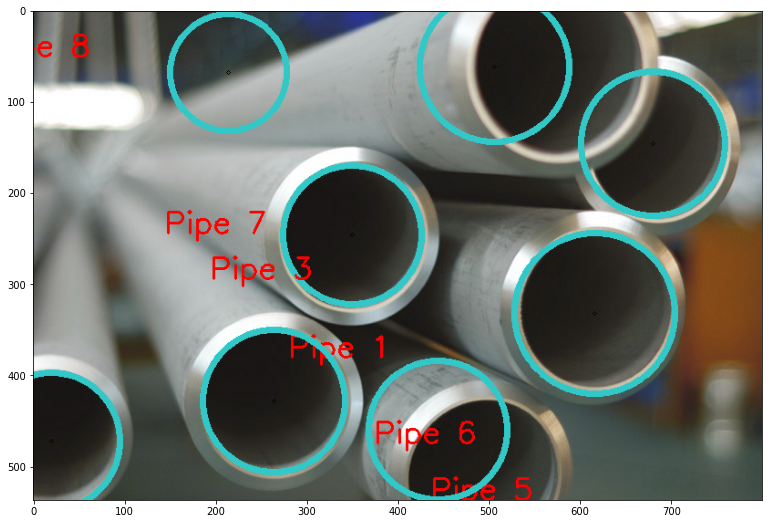

In [64]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.imshow(img_orig)

Intial Task has been sorted out ... The next step will be to refine the algorithm